Esta notebook es para obtener imágenes de distintos tipos para luego usar en occlusion

In [59]:
import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
import glob
from pathlib import Path
import SimpleITK as sitk # para calcular rangos
import numpy as np
import io
from PIL import Image
import random
from nilearn.image import resample_img
import pandas as pd
from nilearn import plotting

In [60]:
csv = pd.read_csv("../Sets/Muestra3700_80_10_10_dxvisit953_test.csv")

In [61]:
def get_image_by_dx(dx, subject_index = 0):
    subject = csv[csv['DX_vis'] == dx]['Subject'].unique()[subject_index]
    last_image = csv[csv['Subject'] == subject]['Image Data ID'].tail(1)
    number_of_images = len(csv[csv['Subject'] == subject])
    return subject, last_image.item(), number_of_images

In [62]:
IMAGES_DIR = "/Users/hugom/Tesis/Imagenes/ADNI-MUESTRA-FULL-stripped"

In [63]:
def get_nifti_img(image_id):
    print(f"Cargando nifti con image id = {image_id}")
    file_pattern = os.path.join(IMAGES_DIR, f"*{image_id}.nii")
    matching_files = glob.glob(file_pattern)
    print(len(matching_files))
    brain_vol = nib.load(matching_files[0])
    return brain_vol

In [64]:
def draw_img(nimg, **kwargs):
    brain_vol_data = nimg.get_fdata()
    fig, ax = plt.subplots(figsize=[100, 50])
    plotting.plot_img(nimg, cmap='gray', axes=ax, draw_cross = False, **kwargs)
    plt.show()

# CN

In [78]:
subject, image, number_of_images = get_image_by_dx('no-AD', 4)
subject, image, number_of_images

('116_S_1232', 'I223643', 1)

In [72]:
nimg = get_nifti_img(image)

Cargando nifti con image id = I77185
1


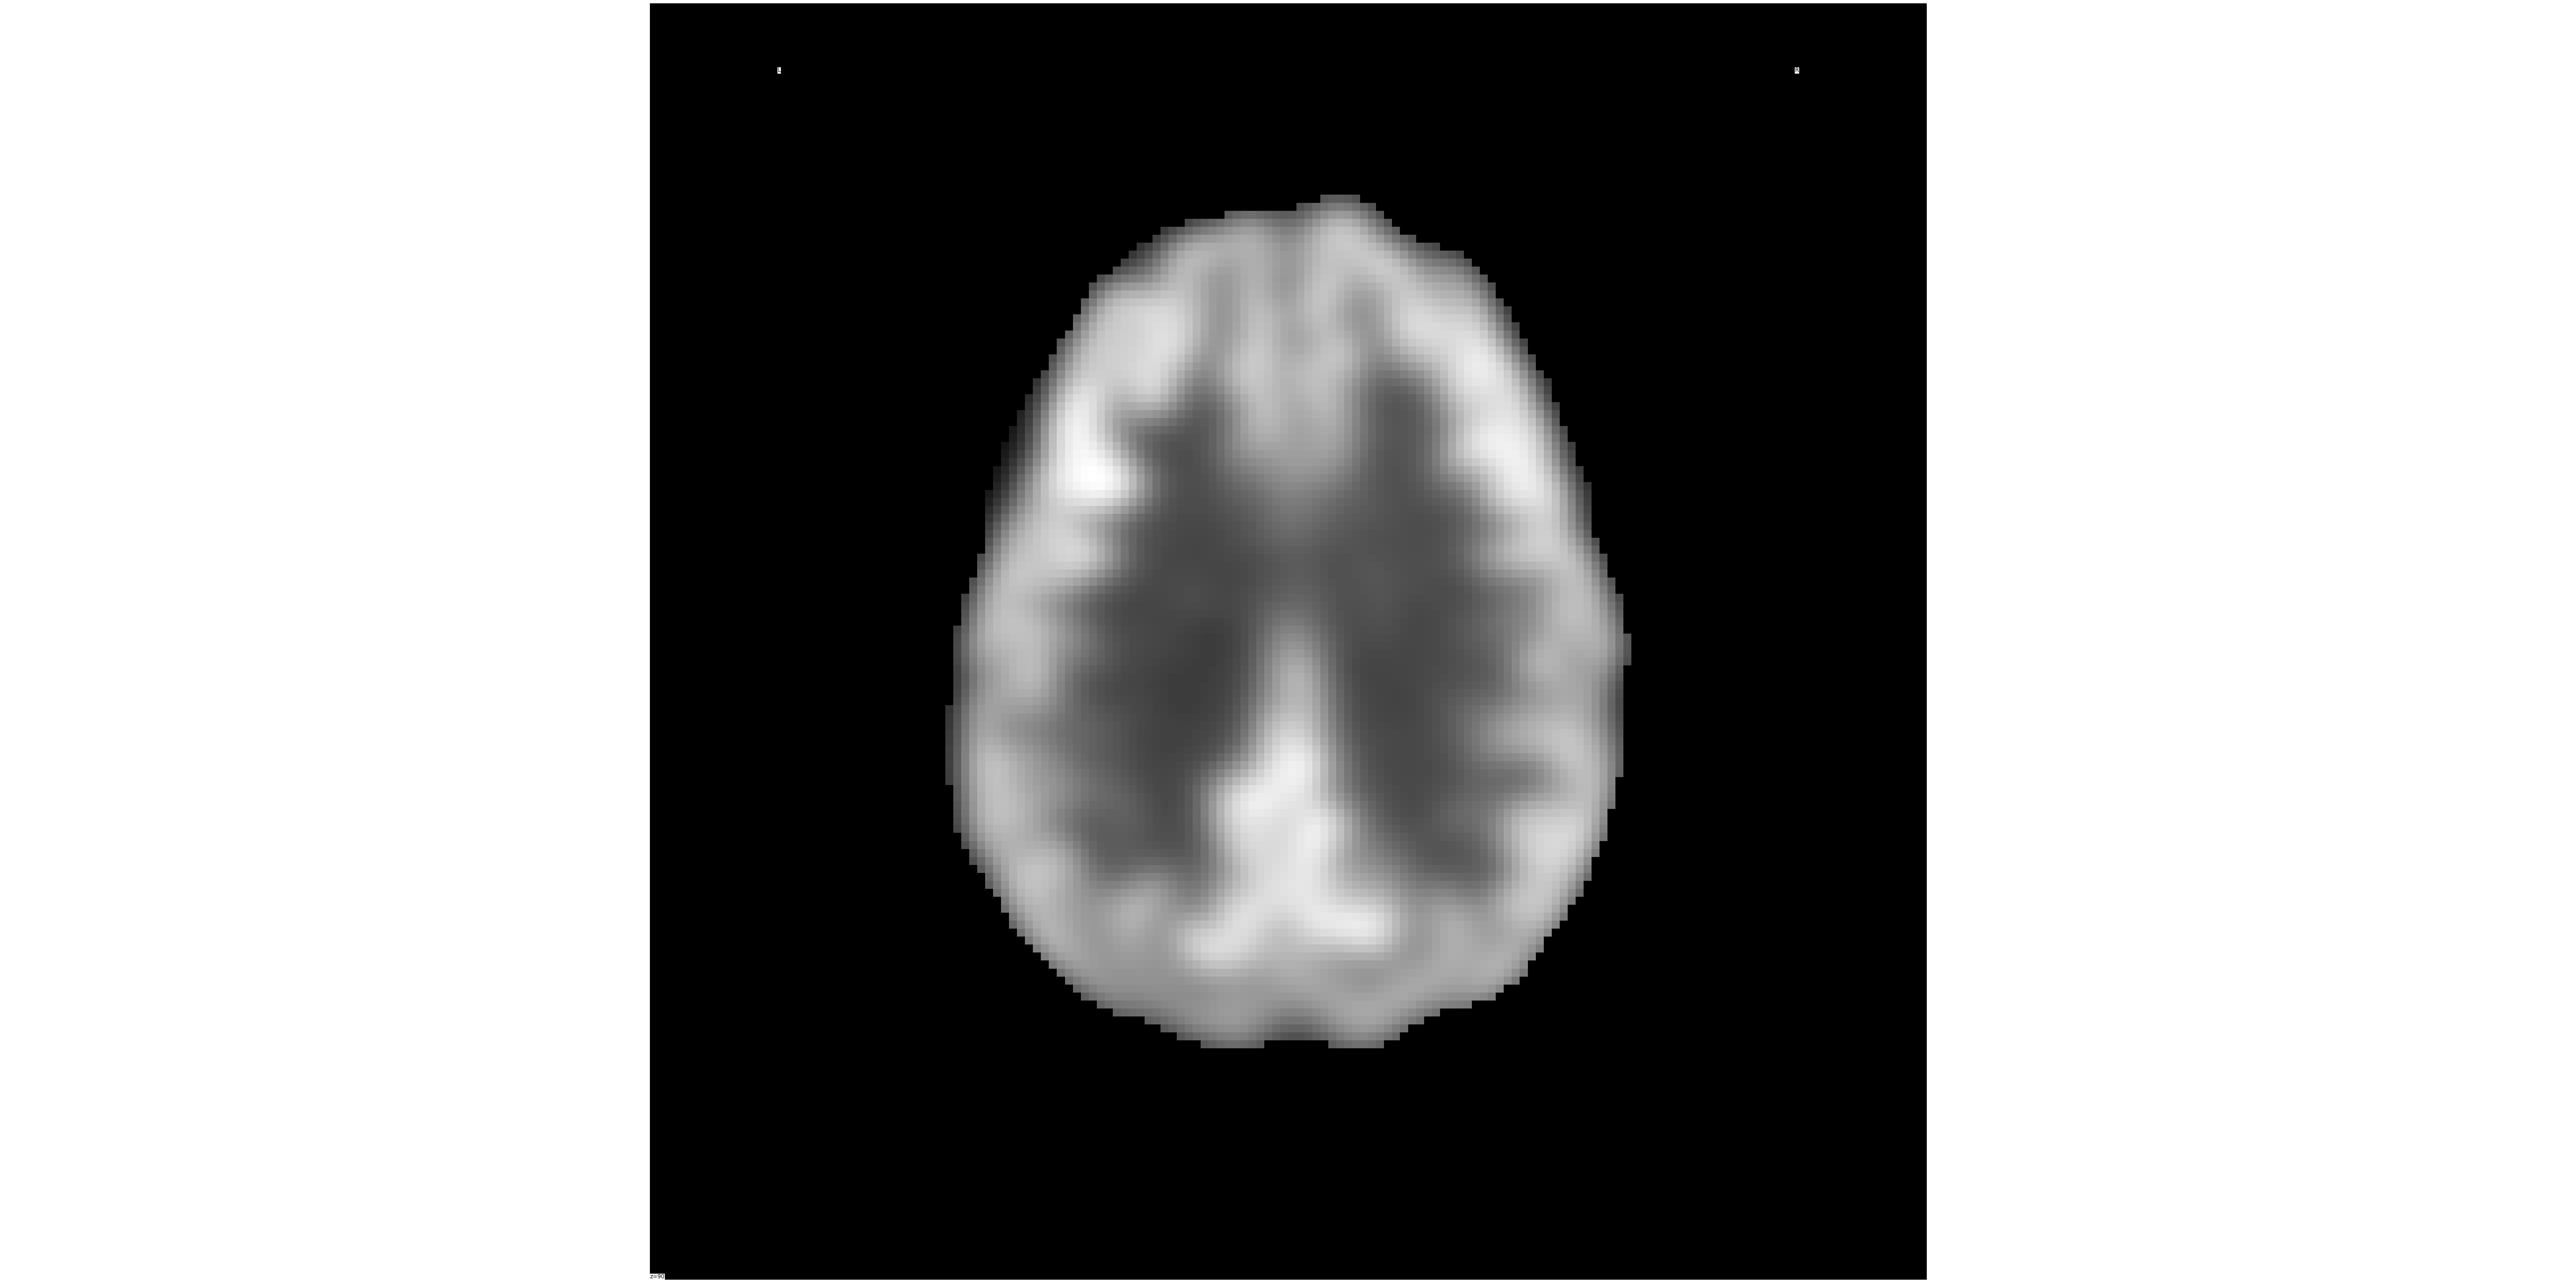

In [73]:
draw_img(nimg,display_mode = 'z', cut_coords = [90])

# AD

In [83]:
subject, image, number_of_images = get_image_by_dx('AD', 4)
subject, image, number_of_images

('137_S_1041', 'I85844', 1)

In [69]:
nimg = get_nifti_img(image)

Cargando nifti con image id = I347770
1


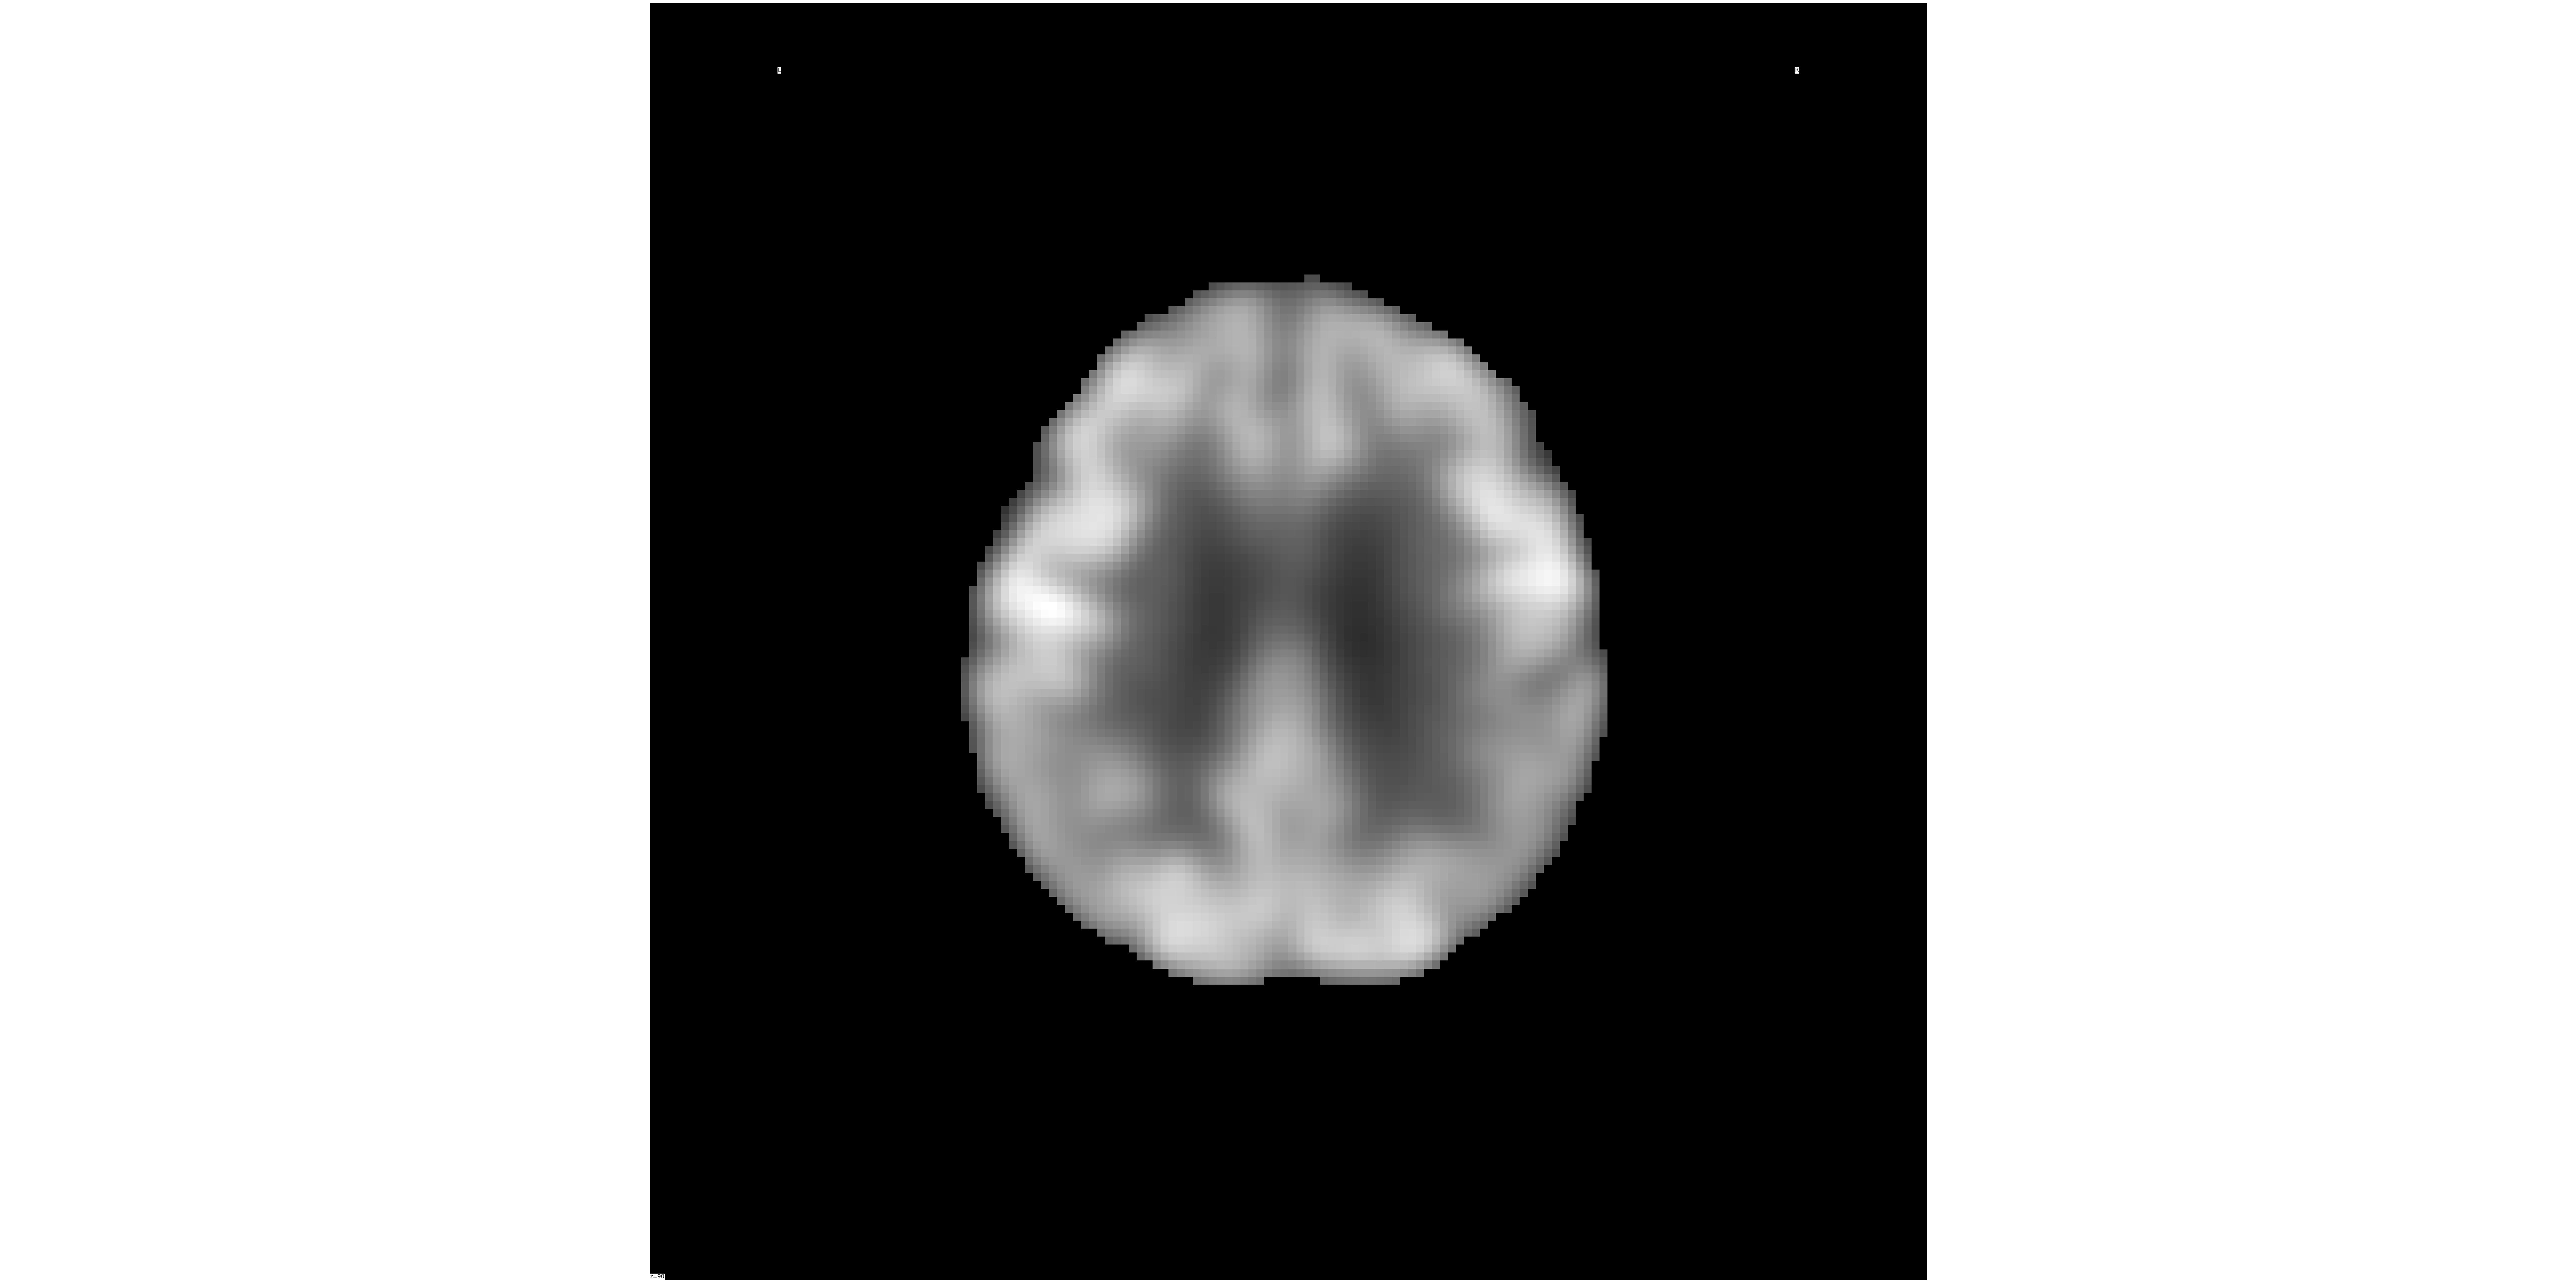

In [70]:
draw_img(nimg,display_mode = 'z', cut_coords = [90])

# Para el plan de tésis